In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


In [3]:
 def plot_images(images, labels):
    '''Plot images with their labels. Ten each row'''
    plt.figure(figsize=(20, 10))
    columns = 10
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
        ax.set_title(f"{labels[i]}", fontsize=16)
        plt.axis('off')
        plt.subplots_adjust(bottom=0.1)
        plt.imshow(image, cmap='gray')

def get_samples(n_samples, X, y):
    '''Get n_samples images randomly'''
    samples = np.random.choice(np.arange(len(y)), n_samples, replace=False)
    return X[samples], y[samples]

def get_digit(digit, n_samples, X, y):
    '''Get n_samples images of the class digit randomly'''
    y_digit = y[y == digit]
    samples = np.random.choice(np.arange(len(y_digit)), n_samples, replace=False)
    return X[y == digit][samples], y_digit[samples]

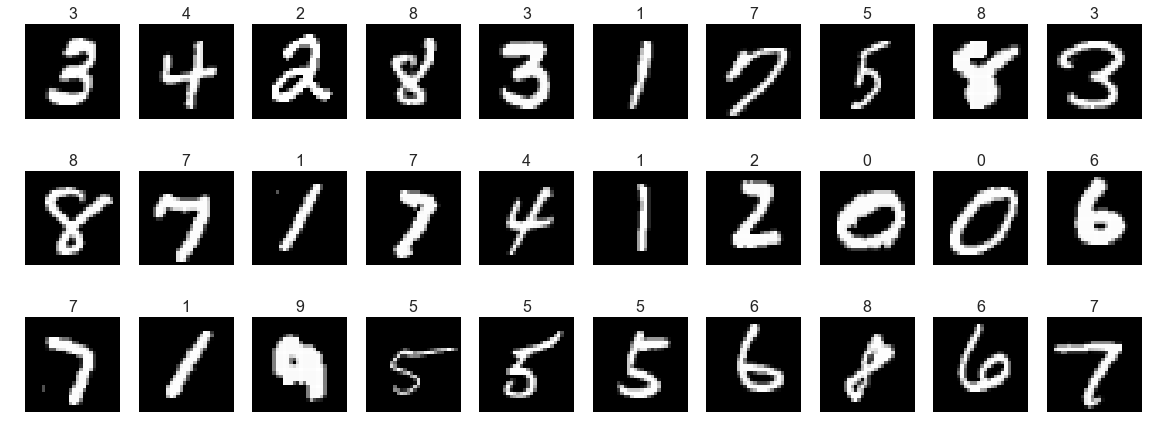

In [4]:
n_samples = 30
images, labels = get_samples(n_samples, X_train, y_train)
# images, labels = get_digit(4, n_samples)
plot_images(images, labels)

In [13]:
# Your code here
sns.countplot(y_train)
sns.countplot(y_test)

AttributeError: module 'pandas' has no attribute 'unique'

In [14]:
# Your code here
print('Pixel value range:', X_train.min(), X_train.max())

Pixel value range: 0 255


In [15]:
n_samples = 1000
n_test_samples = 200
# Fill the blanks
X_train_flat, y_train_flat = get_samples(n_samples, X_train, y_train)
X_test_flat, y_test_flat = get_samples(n_test_samples, X_test, y_test)

# Normalization
X_train_flat = X_train_flat.reshape((n_samples, -1))/255
X_test_flat = X_test_flat.reshape((n_test_samples, -1))/255

In [16]:
print('Training data', X_train_flat.shape)
print('Test data', X_test_flat.shape)

Training data (1000, 784)
Test data (200, 784)


In [17]:
#Train model
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [18]:
# Your code here
clf = SVC(kernel='linear')
clf.fit(X_train_flat, y_train_flat)

SVC(kernel='linear')

In [19]:
parameters = {'gamma': [0.0001, 0.001, 0.01],
              'C':[0.01, 0.1, 1, 10, 100]}

model = SVC(kernel='rbf')

gridsearch_models = GridSearchCV(estimator=model,
                                 param_grid=parameters,
                                 scoring='accuracy',
                                 cv=5, n_jobs=-1)

gridsearch_models.fit(X_train_flat, y_train_flat)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.01]},
             scoring='accuracy')

In [12]:
pd.DataFrame(gridsearch_models.cv_results_)

AttributeError: module 'pandas' has no attribute 'DataFrame'

In [20]:
print('Best params', gridsearch_models.best_params_)
print('Best score', gridsearch_models.best_score_)

Best params {'C': 10, 'gamma': 0.01}
Best score 0.9020000000000001


In [21]:
best_model = gridsearch_models.best_estimator_

In [22]:
#evaluation
# Your code here
predictions = best_model.predict(X_test_flat)
print('Accuracy Score:', accuracy_score(y_test_flat, predictions))

Accuracy Score: 0.905


In [23]:
# Your code here
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test_flat, predictions), cmap="YlGnBu", annot=True, fmt="d")
plt.title(f'Accuracy score: {accuracy_score(y_test_flat, predictions)}', fontsize=20)
plt.show()


AttributeError: module 'pandas' has no attribute 'DataFrame'

<Figure size 720x720 with 0 Axes>

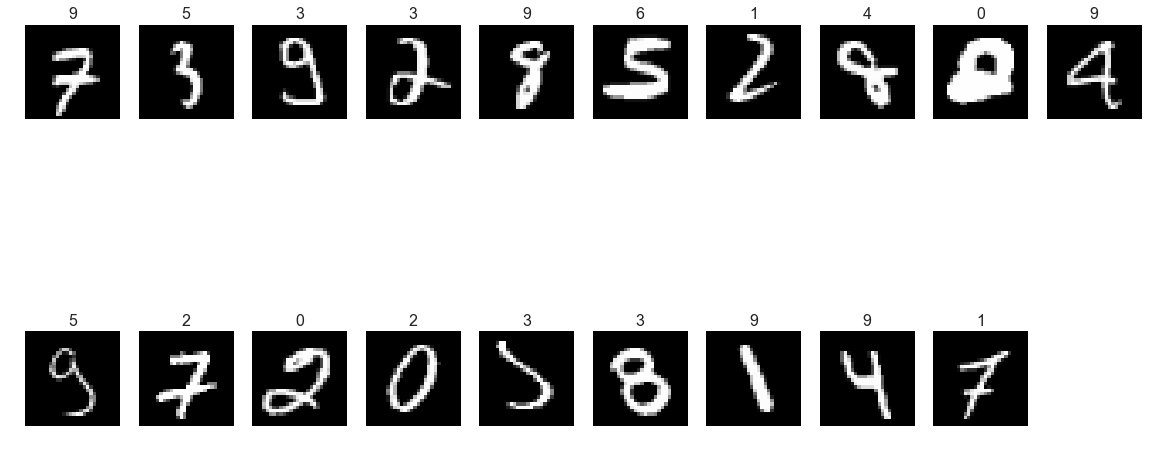

In [24]:
# Your code here
wrong_predicted_images = X_test_flat[y_test_flat != predictions].reshape((-1, 28, 28))
wrong_predictions = predictions[y_test_flat != predictions]

plot_images(wrong_predicted_images, wrong_predictions)

In [25]:
#save model
import pickle

pickle.dump(clf, open('svm_mnist.pkl', 'wb'))

In [26]:
# Your code here
with open('svm_mnist.pkl', 'rb') as model:
    reload_model = pickle.load(model)

predictions = reload_model.predict(X_test_flat)
print(f'Accuracy score: {accuracy_score(y_test_flat, predictions)}')

Accuracy score: 0.87
